# Tratado de exploración Jupyter I

## 1. Preparar los motores

- ¡Importar importar que el mundo se va a acabar!

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import time
import pickle
from __future__ import division
import csv

- Definición de funciones auxiliares

In [2]:
# Cargar diccionario de estaciones de metro
dict_metro = {}
with open('/home/cata/Documentos/Datois/Diccionario-EstacionesMetro.csv',mode='r') as infile:
    reader = csv.reader(infile,delimiter=';')
    dict_metro = {rows[5]:rows[7] for rows in reader}

In [3]:
# Función que estandariza los valores de los paraderos de subida y bajada
def update_vals(row, data=dict_metro):    
    if row.par_subida in data:
        row.par_subida = data[row.par_subida]
    if row.par_bajada in data:
        row.par_bajada = data[row.par_bajada]
    return row


In [4]:
# Función que busca los indices de los valores en la matriz que coinciden con argumento
def quienCalzaCon(iden_matris,argumento):
    i = 0
    identified_indexs = []
    limit = len(iden_matris)
    while (i<limit):
        the_index = np.argmax(iden_matrix[:,i])
        if(the_index==argumento):
            identified_indexs.append(i)
        i += 1
    return identified_indexs
    

In [5]:
def queryToCSV(matrix, user_id, user_index, str_diff = ''):
    query = 'id ==' + str(user_id)
    df_query = matrix.query(query)
    file_path =  '/home/cata/Documentos/sequences/' + str(user_id) + '_' + str(user_index) + '_' + str_diff + '.csv'
    df_query.to_csv(path_or_buf=file_path)

- Leer hace bien 

In [6]:
#frame = pd.read_csv('/home/cata/Documentos/Datois/etapas100000_abril.csv')
frame = pd.read_csv('/home/cata/Documentos/Datois/etapas_2013_abril_allyearsids_10_100000.csv')
frame.head()

,tiempo_subida,id,x_subida,y_subida,tipo_transporte,serviciosentidovariante,tipo_dia,nviaje,netapa,x_bajada,y_bajada,tiempo_bajada,par_subida,par_bajada,zona_subida,zona_bajada,adulto
0,2013-04-21 19:55:16,1132106,346723,6299454,BUS,T203 00I,DOMINGO,13,2,348100,6289103,2013-04-21 20:24:17,E-20-199-NS-2,T-24-205-NS-20,307,348,0
1,2013-04-21 19:35:52,1132106,351378,6302574,BUS,T502 00R,DOMINGO,13,1,346761,6299570,2013-04-21 19:49:12,T-15-135-OP-110,T-4-19-NS-100,188,55,0
2,2013-04-21 07:12:35,1132106,346722,6299393,BUS,T502 00I,DOMINGO,12,2,351366,6302551,2013-04-21 07:26:43,E-20-289-PO-5,T-15-135-PO-5,266,188,0
3,2013-04-21 06:42:07,1132106,348110,6289140,BUS,T203 00R,DOMINGO,12,1,346813,6299398,2013-04-21 07:04:18,T-22-205-SN-65,E-20-190-SN-40,328,307,0
4,2013-04-19 07:25:09,1132106,346717,6299455,BUS,T203 00I,LABORAL,11,2,NaN,NaN,NaN,E-20-199-NS-2,NaN,307,NaN,NaN


In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
tiempo_subida              100000 non-null object
id                         100000 non-null int64
x_subida                   99224 non-null float64
y_subida                   99224 non-null float64
tipo_transporte            100000 non-null object
serviciosentidovariante    98074 non-null object
tipo_dia                   100000 non-null object
nviaje                     100000 non-null int64
netapa                     100000 non-null int64
x_bajada                   86774 non-null float64
y_bajada                   86774 non-null float64
tiempo_bajada              86774 non-null object
par_subida                 99195 non-null object
par_bajada                 86767 non-null object
zona_subida                99180 non-null float64
zona_bajada                86764 non-null float64
adulto                     86774 non-null float64
dtypes: float64(7), int64(3), object(7)
memory 

- Paso los tiempos de string a timestamp para luego calcular la diferencia entre una transacción y otra

In [8]:
frame['tiempo_subida'] = pd.to_datetime(frame.tiempo_subida)
frame = frame.sort_values(by=['id', 'tiempo_subida'])

In [9]:
frame['diferencia_tiempo'] = (frame['tiempo_subida']-frame['tiempo_subida'].shift()).fillna(0)

In [10]:
frame.head()

,tiempo_subida,id,x_subida,y_subida,tipo_transporte,serviciosentidovariante,tipo_dia,nviaje,netapa,x_bajada,y_bajada,tiempo_bajada,par_subida,par_bajada,zona_subida,zona_bajada,adulto,diferencia_tiempo
23,2013-04-14 06:45:44,1132106,348108,6289153,BUS,T203 00R,DOMINGO,1,1,346818,6299394,2013-04-14 07:07:02,T-22-205-SN-65,E-20-190-SN-40,328,307,0,0 days 00:00:00
22,2013-04-14 07:51:52,1132106,346751,6299389,BUS,T502 00I,DOMINGO,2,1,351363,6302549,2013-04-14 08:04:11,E-20-291-PO-20,T-15-135-PO-5,307,188,0,0 days 01:06:08
21,2013-04-14 19:56:47,1132106,351368,6302559,BUS,T502 00R,DOMINGO,3,1,346763,6299568,2013-04-14 20:09:11,T-15-135-OP-110,T-4-19-NS-100,188,55,0,0 days 12:04:55
20,2013-04-14 20:15:25,1132106,346713,6299427,BUS,T203 00I,DOMINGO,3,2,348095,6289148,2013-04-14 20:40:51,E-20-199-NS-2,T-24-205-NS-20,307,348,0,0 days 00:18:38
19,2013-04-15 21:04:59,1132106,348103,6289191,BUS,T206 00R,LABORAL,4,1,346844,6299320,2013-04-15 21:33:23,T-22-205-SN-65,T-20-190-SN-35,328,309,0,1 days 00:49:34


- Elimino las columnas que no usaré (cuidado, correr solo una vez :)

In [11]:
frame.drop(frame.columns[[2,3,4,5,9,10,11,14,15,16]], axis=1, inplace=True)
frame.head()

,tiempo_subida,id,tipo_dia,nviaje,netapa,par_subida,par_bajada,diferencia_tiempo
23,2013-04-14 06:45:44,1132106,DOMINGO,1,1,T-22-205-SN-65,E-20-190-SN-40,0 days 00:00:00
22,2013-04-14 07:51:52,1132106,DOMINGO,2,1,E-20-291-PO-20,T-15-135-PO-5,0 days 01:06:08
21,2013-04-14 19:56:47,1132106,DOMINGO,3,1,T-15-135-OP-110,T-4-19-NS-100,0 days 12:04:55
20,2013-04-14 20:15:25,1132106,DOMINGO,3,2,E-20-199-NS-2,T-24-205-NS-20,0 days 00:18:38
19,2013-04-15 21:04:59,1132106,LABORAL,4,1,T-22-205-SN-65,T-20-190-SN-35,1 days 00:49:34


- Falta estandarizar estaciones de metro con dos nombres

In [12]:
frame = frame.apply(update_vals, axis=1)
frame.head()

,tiempo_subida,id,tipo_dia,nviaje,netapa,par_subida,par_bajada,diferencia_tiempo
23,2013-04-14 06:45:44,1132106,DOMINGO,1,1,T-22-205-SN-65,E-20-190-SN-40,0 days 00:00:00
22,2013-04-14 07:51:52,1132106,DOMINGO,2,1,E-20-291-PO-20,T-15-135-PO-5,0 days 01:06:08
21,2013-04-14 19:56:47,1132106,DOMINGO,3,1,T-15-135-OP-110,T-4-19-NS-100,0 days 12:04:55
20,2013-04-14 20:15:25,1132106,DOMINGO,3,2,E-20-199-NS-2,T-24-205-NS-20,0 days 00:18:38
19,2013-04-15 21:04:59,1132106,LABORAL,4,1,T-22-205-SN-65,T-20-190-SN-35,1 days 00:49:34


In [13]:
frame.query('id ==24547373')

,tiempo_subida,id,tipo_dia,nviaje,netapa,par_subida,par_bajada,diferencia_tiempo
15547,2013-04-15 08:40:05,24547373,LABORAL,1,1,MANUEL MONTT,UNIVERSIDAD DE CHILE,-6 days +15:29:15
15546,2013-04-15 13:21:49,24547373,LABORAL,2,1,UNIVERSIDAD DE CHILE,MANUEL MONTT,0 days 04:41:44
15545,2013-04-15 14:40:58,24547373,LABORAL,3,1,MANUEL MONTT,UNIVERSIDAD DE CHILE,0 days 01:19:09
15544,2013-04-15 19:05:37,24547373,LABORAL,4,1,UNIVERSIDAD DE CHILE,MANUEL MONTT,0 days 04:24:39
15543,2013-04-16 08:41:59,24547373,LABORAL,5,1,MANUEL MONTT,UNIVERSIDAD DE CHILE,0 days 13:36:22
15542,2013-04-16 20:08:27,24547373,LABORAL,6,1,UNIVERSIDAD DE CHILE,MANUEL MONTT,0 days 11:26:28
15541,2013-04-17 08:31:43,24547373,LABORAL,7,1,MANUEL MONTT,UNIVERSIDAD DE CHILE,0 days 12:23:16
15540,2013-04-17 12:48:11,24547373,LABORAL,8,1,UNIVERSIDAD DE CHILE,MANUEL MONTT,0 days 04:16:28
15539,2013-04-17 14:46:06,24547373,LABORAL,9,1,MANUEL MONTT,UNIVERSIDAD DE CHILE,0 days 01:57:55
15538,2013-04-17 20:18:04,24547373,LABORAL,10,1,UNIVERSIDAD DE CHILE,MANUEL MONTT,0 days 05:31:58


In [14]:
frame.query('par_subida == "SANTA ANA L2"')

,tiempo_subida,id,tipo_dia,nviaje,netapa,par_subida,par_bajada,diferencia_tiempo


- Explorar los periodos de tiempo en distintas locaciones

In [15]:
## TODO

## 2. Crear perfiles de usuarios con las locaciones mínimas y la matriz TPM

In [16]:
tpm = [] # Transition Probability Matrix (TPM)
mls = [] # minimum location set (mlt)
nvisitas = [] # diccionario contador de visitas a cada locación
profile = {} # diccionario con tpm y mls para cada usuario
users_profiles= [] # arreglo de diccionarios
nlocations = [] # arreglo con el numero de locaciones por cada usuario
nsecuencias = []
last_id = 0
last_stop = ""
last_stop_index = 0
counter = 0
matrix_size = 30 # maximo numero de posiciones admitidas por usuario

In [17]:
for transaction in zip(frame['id'], frame['par_subida'], frame['par_bajada']):
    counter +=1
    user_id = transaction[0]
    par_subida = transaction[1]
    par_bajada = transaction[2]
    # no se pierde el paradero de bajada, porque cuando no hay subida no se puede estimar la bajada
    if (par_subida!=par_subida):
        continue        
    if (user_id!=last_id):
        # si ya paso una vuelta, agregar TPM y minimum location set a users_profiles
        if(counter>1):
            n_locations = len(mls)
            nlocations.append(n_locations)
            nsecuencias.append(sum(nvisitas))
            tpm = tpm[0:n_locations,0:n_locations]
            tpm = tpm/tpm.sum(axis=1)[:,None]
            profile = {'user_id':last_id,'mls':mls,'tpm':tpm,'nvisitas':nvisitas}
            users_profiles.append(profile)
        # construir nueva TPM y mls no vacia para que no se caiga
        last_id = user_id
        tpm = np.zeros((matrix_size,matrix_size))
        mls = [par_subida]
        last_stop = par_subida
        last_stop_index = 0
        nvisitas = [0]
        counter = 1
    # buscar si la locación ya había sido visitada 
    try:
        index_subida = mls.index(par_subida)
    except ValueError:
        index_subida = -1
    # si la subida no había sido visitada se debe agregar al mls
    if (index_subida < 0):
        if(len(mls)<matrix_size-1):
            mls.append(par_subida)
            nvisitas.append(1)
            index_subida = len(mls) - 1
            if(par_subida!=last_stop):
                tpm[last_stop_index,index_subida] +=1
            # si la bajada no se pudo calcular solo se considera la subida y 
            # se deja para calcular tpm en la proxima ronda 
            if (par_bajada!=par_bajada):
                last_stop = par_subida
                last_stop_index = index_subida
            else:
                try:
                    index_bajada = mls.index(par_bajada)
                except ValueError:
                    index_bajada = -1
                # si la bajada no se había visitado antes, agregar bajada y sumar nvisitas 
                if (index_bajada < 0):
                    mls.append(par_bajada)
                    nvisitas.append(1)
                    index_bajada = len(mls) - 1
                    tpm[index_subida,index_bajada] +=1
                # sumar nvisita 
                else:
                    if(index_subida!=index_bajada):
                        nvisitas[index_bajada] = nvisitas[index_bajada]+1
                        tpm[index_subida,index_bajada] +=1
                last_stop = par_bajada
                last_stop_index = index_bajada
    else:
        nvisitas[index_subida] = nvisitas[index_subida]+1
        if(par_subida!=last_stop):
                tpm[last_stop_index,index_subida] +=1
        # subida estaba de antes y no hay bajada
        # REVISAR SI ESTO NO ES REDUNDANTE!
        if (par_bajada!=par_bajada):
            last_stop = par_subida
            last_stop_index = index_subida
        # hay subida y bajada
        else:
            try:
                index_bajada = mls.index(par_bajada)
            except ValueError:
                index_bajada = -1
            # hay bajada pero no estaba antes
            if (index_bajada<0):
                if(len(mls)<matrix_size-1):
                    mls.append(par_bajada)
                    last_stop = par_bajada
                    nvisitas.append(1)
                    index_bajada = len(mls) - 1
                    last_stop_index = index_bajada
                    tpm[index_subida,index_bajada] +=1
                else:
                    last_stop = par_subida
                    last_stop_index = index_subida
            # subida y bajada estaban de antes
            else:
                if(index_bajada!=index_subida):
                    nvisitas[index_bajada] = nvisitas[index_bajada]+1
                    tpm[index_subida,index_bajada] +=1

In [18]:
800/100

8.0

- Ejemplo de perfil de usuario

In [19]:
users_profiles[0]

{'mls': ['T-22-205-SN-65',
  'E-20-190-SN-40',
  'E-20-291-PO-20',
  'T-15-135-PO-5',
  'T-15-135-OP-110',
  'T-4-19-NS-100',
  'E-20-199-NS-2',
  'T-24-205-NS-20',
  'T-20-190-SN-35',
  'E-20-289-PO-5',
  'T-22-205-SN-55',
  'T-24-205-NS-30',
  'T-15-135-OP-105'],
 'nvisitas': [5, 5, 4, 6, 5, 6, 6, 4, 1, 2, 1, 1, 1],
 'tpm': array([[ 0.        ,  0.8       ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.2       ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.125     ,  0.        ,  0.375     ,  0.        ,  0.25      ,
          0.        ,  0.25      ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.5       ,
        

## X. Guardar dataframe abril

In [20]:
with open('df_abril.pickle', 'w') as f:
    pickle.dump(frame, f)

## 3. Explorar los perfiles de usuario

- Cuantos usuarios habrá en esta muestra?

In [21]:
numero_usuarios = len(users_profiles)
numero_usuarios

5168

- Cuantas locaciones habrá por usuario?

(array([  83.,  102.,  108.,  139.,  142.,  204.,  260.,  248.,  286.,
         300.,  311.,  312.,  279.,  251.,  274.,  209.,  209.,  186.,
         188.,  138.,  130.,  126.,  114.,   81.,   81.,   60.,   64.,  283.]),
 array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.]),
 <a list of 28 Patch objects>)

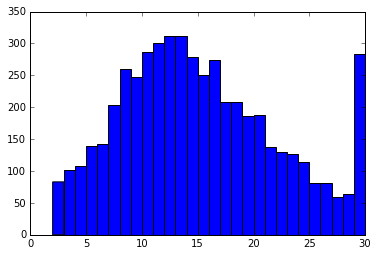

In [22]:
plt.hist(nlocations,28)

## 4. Preparar el periodo de identificación

- Leer hace bien 

In [23]:
df_id_period = pd.read_csv('/home/cata/Documentos/Datois/etapas_2013_septiembre_allyearsids_10_100000.csv')
df_id_period.head()

,tiempo_subida,id,x_subida,y_subida,tipo_transporte,serviciosentidovariante,tipo_dia,nviaje,netapa,x_bajada,y_bajada,tiempo_bajada,par_subida,par_bajada,zona_subida,zona_bajada,adulto
0,2013-09-29 19:58:57,1132106,346742,6299422,BUS,T206 00I,DOMINGO,16,2,348092,6289202,2013-09-29 20:30:10,E-20-199-NS-2,T-24-205-NS-20,307,348,0
1,2013-09-29 19:38:31,1132106,351400,6302597,BUS,T502 00R,DOMINGO,16,1,346731,6299466,2013-09-29 19:54:38,T-15-135-OP-110,T-4-19-NS-100,188,55,0
2,2013-09-29 07:49:32,1132106,346768,6299380,BUS,T502 00I,DOMINGO,15,1,351370,6302561,2013-09-29 08:04:30,E-20-291-PO-20,T-15-135-PO-5,307,188,0
3,2013-09-29 06:48:11,1132106,348107,6289130,BUS,T206 00R,DOMINGO,14,1,346852,6299355,2013-09-29 07:10:26,T-22-205-SN-65,T-20-190-SN-35,328,309,0
4,2013-09-28 07:32:43,1132106,346729,6299435,BUS,T206 00I,SABADO,13,2,348099,6289122,2013-09-28 07:54:57,E-20-199-NS-2,T-24-205-NS-20,307,348,0


In [24]:
df_id_period['tiempo_subida'] = pd.to_datetime(df_id_period.tiempo_subida)
df_id_period = df_id_period.sort_values(by=['id', 'tiempo_subida'])

In [25]:
frame['diferencia_tiempo'] = (frame['tiempo_subida']-frame['tiempo_subida'].shift()).fillna(0)

Reflexion: Debiese utilizar por ahora solo las columnas que me sirven, sino el todos contra todos será muy dificil

- Elimino las columnas que no usaré (cuidado, correr solo una vez :)

In [26]:
df_id_period.drop(df_id_period.columns[[2,3,4,5,9,10,11,14,15,16]], axis=1, inplace=True)
df_id_period.head()

,tiempo_subida,id,tipo_dia,nviaje,netapa,par_subida,par_bajada
26,2013-09-23 20:58:46,1132106,LABORAL,1,1,T-22-205-SN-65,E-20-190-SN-40
25,2013-09-23 21:24:25,1132106,LABORAL,1,2,E-20-291-PO-20,T-15-135-PO-5
24,2013-09-24 07:15:40,1132106,LABORAL,2,1,T-15-135-OP-110,T-4-19-NS-100
23,2013-09-24 08:00:08,1132106,LABORAL,3,1,E-20-199-NS-2,T-24-205-NS-20
22,2013-09-24 09:13:22,1132106,LABORAL,3,2,L-24-26-OP-25,NaN


- Estandarizo los paraderos de subida y bajada

In [27]:
df_id_period = df_id_period.apply(update_vals, axis=1)
df_id_period.head()

,tiempo_subida,id,tipo_dia,nviaje,netapa,par_subida,par_bajada
26,2013-09-23 20:58:46,1132106,LABORAL,1,1,T-22-205-SN-65,E-20-190-SN-40
25,2013-09-23 21:24:25,1132106,LABORAL,1,2,E-20-291-PO-20,T-15-135-PO-5
24,2013-09-24 07:15:40,1132106,LABORAL,2,1,T-15-135-OP-110,T-4-19-NS-100
23,2013-09-24 08:00:08,1132106,LABORAL,3,1,E-20-199-NS-2,T-24-205-NS-20
22,2013-09-24 09:13:22,1132106,LABORAL,3,2,L-24-26-OP-25,NaN


## X. Guardar dataframe septiembre

In [28]:
with open('df_septiembre.pickle', 'w') as f:
    pickle.dump(df_id_period, f)

## 5. Extraer secuencias y locaciones principales del periodo de identificación

Debo extraer la secuencia de posiciones de las transacciones, y el arreglo de locaciones mas visitadas

In [29]:
tpm = [] # Transition Probability Matrix (TPM)
mls = [] # minimum location set (mlt)
nvisitas = [] # diccionario contador de visitas a cada locación
profile = {} # diccionario con tpm y mls para cada usuario
profiles = [] # arreglo de diccionarios
last_id = 0
last_stop = ""
last_stop_index = 0
counter = 0
n_locations = []

In [30]:
for transaction in zip(df_id_period['id'], df_id_period['par_subida'], df_id_period['par_bajada']):
    counter +=1
    id_user = transaction[0]
    par_subida = transaction[1]
    par_bajada = transaction[2]
    if (par_subida!=par_subida):
        continue        
    if (id_user!=last_id):
        # si ya paso una vuelta, agregar TPM y minimum location set a users_profiles
        if(counter>1):
            n_locations.append(len(mls))
            profile = {'user_id':last_id,'sequence':sequence,'mls':mls,'nvisitas':nvisitas}
            profiles.append(profile)
        last_id = id_user
        # construir mls no vacia para que no se caiga 
        mls = [par_subida]
        sequence = [par_subida]
        last_stop = par_subida
        nvisitas = [0]
        counter = 1
    # buscar si la locación ya había sido visitada 
    try:
        index_subida = mls.index(par_subida)
    except ValueError:
        index_subida = -1
    # si la subida no había sido visitada se debe agregar al mls
    if (index_subida < 0):
        mls.append(par_subida)
        nvisitas.append(1)
        index_subida = len(mls) - 1
        sequence.append(par_subida)
        # si la bajada no se pudo calcular solo se considera la subida y se deja para calcular tpm en la proxima ronda 
        if (par_bajada!=par_bajada):
            last_stop = par_subida
            #print "Iteración n°: " + str(counter) + " , no se pudo estimar la bajada"
        else:
            last_stop = par_bajada
            sequence.append(par_bajada)
            try:
                index_bajada = mls.index(par_bajada)
            except ValueError:
                index_bajada = -1
            # si la bajada no se había visitado antes, agregar bajada y sumar nvisitas 
            if (index_bajada < 0):
                mls.append(par_bajada)
                index_bajada = len(mls)-1
                nvisitas.append(1)
            # sumar nvisita 
            else:
                nvisitas[index_bajada] = nvisitas[index_bajada]+1
    else:
        nvisitas[index_subida] = nvisitas[index_subida]+1
        if(par_subida!=last_stop):
            sequence.append(par_subida)
        # subida estaba de antes y no hay bajada
        # REVISAR SI ESTO NO ES REDUNDANTE!
        if (par_bajada!=par_bajada):
            last_stop = par_subida
        # hay subida y bajada
        else:
            sequence.append(par_bajada)
            last_stop = par_bajada
            try:
                index_bajada = mls.index(par_bajada)
            except ValueError:
                index_bajada = -1
            # hay bajada pero no estaba antes
            if (index_bajada<0):
                mls.append(par_bajada)
                index_bajada = len(mls) - 1
                nvisitas.append(1)
            # subida y bajada estaban de antes
            else:
                nvisitas[index_bajada] = nvisitas[index_bajada]+1


- Por ej. la secuencia 2 es un diccionario con las locaciones minimas, las visitas a esas locaciones, la secuencia y el id del usuario

In [31]:
# Por ej. el perfil 0 es un diccionario con las locaciones minimas, 
# las visitas a esas locaciones, la secuencia y el id del usuario
profiles[0]

{'mls': ['T-22-205-SN-65',
  'E-20-190-SN-40',
  'E-20-291-PO-20',
  'T-15-135-PO-5',
  'T-15-135-OP-110',
  'T-4-19-NS-100',
  'E-20-199-NS-2',
  'T-24-205-NS-20',
  'L-24-26-OP-25',
  'T-22-205-SN-55',
  'E-20-289-PO-5',
  'T-14-121-OP-10',
  'T-14-131-PO-40',
  'T-20-190-SN-35'],
 'nvisitas': [5, 5, 5, 7, 7, 6, 6, 6, 1, 1, 1, 1, 1, 1],
 'sequence': ['T-22-205-SN-65',
  'E-20-190-SN-40',
  'E-20-291-PO-20',
  'T-15-135-PO-5',
  'T-15-135-OP-110',
  'T-4-19-NS-100',
  'E-20-199-NS-2',
  'T-24-205-NS-20',
  'L-24-26-OP-25',
  'T-22-205-SN-55',
  'E-20-190-SN-40',
  'E-20-289-PO-5',
  'T-15-135-PO-5',
  'T-15-135-OP-110',
  'T-4-19-NS-100',
  'E-20-199-NS-2',
  'T-24-205-NS-20',
  'T-22-205-SN-65',
  'E-20-190-SN-40',
  'E-20-291-PO-20',
  'T-15-135-PO-5',
  'T-15-135-OP-110',
  'T-4-19-NS-100',
  'E-20-199-NS-2',
  'T-24-205-NS-20',
  'T-22-205-SN-65',
  'E-20-190-SN-40',
  'E-20-291-PO-20',
  'T-15-135-PO-5',
  'T-15-135-OP-110',
  'T-14-121-OP-10',
  'T-14-131-PO-40',
  'T-15-135-PO-

- Se puede observar que el largo de la secuencia es mayor al de las locaciones minimas

In [32]:
len(profiles[0]['sequence'])

53

In [33]:
len(profiles[0]['mls'])

14

- El número total de perfiles de secuencia extraidos es:

In [34]:
n_users = len(profiles)
n_users

5343

## X. Guardar perfiles y secuencias

In [35]:
with open('users_profiles.pickle', 'w') as f:
    pickle.dump(users_profiles, f)

In [36]:
with open('profiles.pickle', 'w') as f:
    pickle.dump(profiles, f)

## 6. Todos contra todos

- Primero encuentro el minimo entre el numero de tpms y las secuencias, para que la matriz sea cuadrada

In [37]:
limit = np.min((n_users,numero_usuarios))
limit

5168

- Luego comparo todas las tpms contra todas las secuencias

In [38]:
tpm = []
index_correct = []

idenk = 0
iden = np.zeros((limit,limit))
i = 0
j = 0

In [39]:
# asume que son los mismos ids o que se saben de antemano
start_time = time.time()
for profile in users_profiles:
    tpm = profile['tpm']
    id_user = profile['user_id']
    mls = profile['mls']
    for sequence in profiles:
        travel_counter = 0
        largo_secuencia = len(sequence['sequence'])
        p_zero = pow(10,-800/largo_secuencia)
        p_nan = pow(10,-800/largo_secuencia)
        #calcular idenk
        for travel in sequence['sequence']:
            # buscar pik en tpm
            try:
                index_bajada = mls.index(travel)
            except ValueError:
                index_bajada = -1
            if(travel_counter > 0):
                if(index_bajada < 0 or index_subida < 0):
                    pik = p_nan
                else:
                    pik = tpm[index_subida, index_bajada]
                if(pik != pik):
                    pik = p_nan
                elif(pik == 0):
                    pik = p_zero
                # sumar log10
                idenk += np.log10(pik)
            index_subida = index_bajada
            travel_counter +=1

        iden[i,j] = idenk
        j+=1
        if(id_user == sequence['user_id']):
            index_correct.append(idenk)
        idenk = 0
        if(j >= limit):
            break
    i += 1
    j = 0
    if(i >= limit):
        break
delta_time = time.time() - start_time

- Guardar resultados

with open('objs_10.pickle', 'w') as f:
    pickle.dump([iden, index_correct, delta_time], f)

In [7]:
with open('/home/cata/Proyectos/Notebooks & beyond/Notebooks/Normalizasound_2/objs_10.pickle') as f:
    iden, index_correct, delta_time = pickle.load(f)

## 7. Análisis de resultados

- Los indices correctos están en la diagonal, y a pesar de que las secuencias son de distinto largo se logra identificar la correcta

In [8]:
iden_matrix = np.matrix(iden)
df_ident = pd.DataFrame(iden_matrix)
df_ident.head()

,0,1,2,3,4,5,6,7,8,9,...,5158,5159,5160,5161,5162,5163,5164,5165,5166,5167
0,-112.364252,-776.470588,-775.000000,-766.666667,-757.894737,-771.428571,-755.555556,-775.757576,-772.413793,-784.313725,...,-768,-782.222222,-771.428571,-783.333333,-784,-782.222222,-785.454545,-784,-763.636364,-727.272727
1,-784.905660,-450.615126,-775.000000,-766.666667,-757.894737,-771.428571,-755.555556,-775.757576,-772.413793,-784.313725,...,-768,-782.222222,-771.428571,-783.333333,-784,-782.222222,-785.454545,-784,-763.636364,-727.272727
2,-784.905660,-776.470588,-476.982271,-766.666667,-757.894737,-771.428571,-755.555556,-775.757576,-772.413793,-784.313725,...,-768,-782.222222,-771.428571,-783.333333,-784,-782.222222,-785.454545,-784,-763.636364,-727.272727
3,-784.905660,-776.470588,-775.000000,-301.204120,-757.894737,-771.428571,-755.555556,-775.757576,-772.413793,-784.313725,...,-768,-782.222222,-771.428571,-783.333333,-784,-782.222222,-785.454545,-784,-763.636364,-727.272727
4,-784.905660,-776.470588,-775.000000,-766.666667,-379.355608,-771.428571,-755.555556,-775.757576,-772.413793,-784.313725,...,-768,-782.222222,-771.428571,-783.333333,-784,-782.222222,-785.454545,-784,-763.636364,-727.272727


In [9]:
df_ident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5168 entries, 0 to 5167
Columns: 5168 entries, 0 to 5167
dtypes: float64(5168)
memory usage: 203.8 MB


- Porcentaje de identificaciones correctas

In [10]:
i = 0
identified_indexs = []
wrong_indexs = []
correct_indexs = []
selected_indexs = []
n_identified = 0
limit = 5168
while (i<limit):
    the_index = np.argmax(iden_matrix[:,i])
    selected_indexs.append(np.max(iden_matrix[:,i]))
    identified_indexs.append(the_index)
    if(the_index!=i):
        wrong_indexs.append(the_index)
    else:
        correct_indexs.append(the_index)
        n_identified += 1
    i += 1


In [11]:
porcentaje_correcto = n_identified*100/limit
print str(round(porcentaje_correcto,2))+ "%"

67.38%


In [12]:
len(correct_indexs)

3482

Histograma de los indices seleccionados como correctos, y los indices de los correctamente seleccionados

(array([   6.,   23.,   46.,   99.,  155.,  158.,  187.,  201.,  180.,
         186.,  195.,  189.,  207.,  196.,  174.,  181.,  171.,  193.,
         175.,  159.,  161.,  141.,  164.,  155.,  130.,  138.,  124.,
         137.,  131.,  113.,  103.,   92.,   97.,   90.,   55.,   44.,
          35.,   27.,    8.,  142.]),
 array([-765.2173913 , -746.08695652, -726.95652174, -707.82608696,
        -688.69565217, -669.56521739, -650.43478261, -631.30434783,
        -612.17391304, -593.04347826, -573.91304348, -554.7826087 ,
        -535.65217391, -516.52173913, -497.39130435, -478.26086957,
        -459.13043478, -440.        , -420.86956522, -401.73913043,
        -382.60869565, -363.47826087, -344.34782609, -325.2173913 ,
        -306.08695652, -286.95652174, -267.82608696, -248.69565217,
        -229.56521739, -210.43478261, -191.30434783, -172.17391304,
        -153.04347826, -133.91304348, -114.7826087 ,  -95.65217391,
         -76.52173913,  -57.39130435,  -38.26086957,  -19.13043478

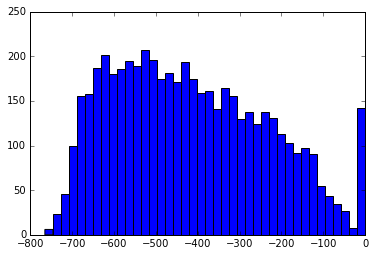

In [13]:
plt.hist(selected_indexs,40)

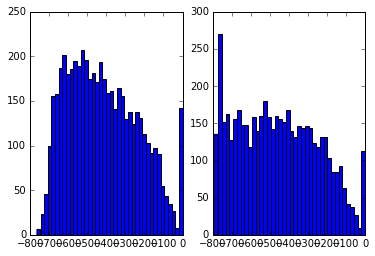

In [14]:
fig, axs = plt.subplots(1,2)
plt.subplot(121)
plt.hist(selected_indexs,40)
plt.subplot(122)
plt.hist(index_correct,40)
plt.show()

- Se observa redundancia en los incorrectamente identificados, probablemente causado por usuarios que viajan mucho

In [15]:
x = np.array(identified_indexs)
y = np.bincount(x)
ii = np.nonzero(y)[0]

In [16]:
frequency_correct = zip(ii,y[ii]) 

In [17]:
counter = 0
ncounter = 0
freq_max_1 = 0
freq_max_2 = 0
freq_max_3 = 0
for element in frequency_correct:
    if(element[1]>1):
        counter +=1
        ncounter += element[1]
    

- Cuantos ids se asignan a más de un usuario

In [18]:
counter

1013

- A cuantos usuarios?

In [19]:
ncounter

2302

- Si quito estos ids, cual es el porcentaje de identificación?

In [20]:
x = limit-1-ncounter

In [21]:
(n_identified-counter)/x*100

86.178010471204189

- Falta analizar los casos en que el indice correcto es muy bajo

In [22]:
# TODO

- Falta ver quienes son los que se mal identifican 

In [23]:
# TODO

- Falta ver quienes son los que se identifican con muchos y si son las mismas personas (compatibilidad)

In [24]:
# TODO

- Debiese alargar la secuencia si es que es menor que las locaciones de la tpm?<br/>
    pensar en casos de borde

In [25]:
# TODO

- Ordenar ids más usados

In [26]:
frequency_correct.sort(key = lambda t: t[1], reverse=True)
frequency_correct

[(1415, 7),
 (1954, 7),
 (2809, 7),
 (4362, 6),
 (4844, 6),
 (161, 5),
 (563, 5),
 (1054, 5),
 (1372, 5),
 (1742, 5),
 (3629, 5),
 (4080, 5),
 (4318, 5),
 (5030, 5),
 (0, 4),
 (482, 4),
 (579, 4),
 (651, 4),
 (673, 4),
 (836, 4),
 (947, 4),
 (1056, 4),
 (1161, 4),
 (1250, 4),
 (1363, 4),
 (1376, 4),
 (1444, 4),
 (1514, 4),
 (2167, 4),
 (2310, 4),
 (2598, 4),
 (2670, 4),
 (2849, 4),
 (3088, 4),
 (3237, 4),
 (3256, 4),
 (3641, 4),
 (3854, 4),
 (4106, 4),
 (4140, 4),
 (4170, 4),
 (31, 3),
 (50, 3),
 (74, 3),
 (84, 3),
 (108, 3),
 (170, 3),
 (201, 3),
 (203, 3),
 (222, 3),
 (232, 3),
 (239, 3),
 (249, 3),
 (318, 3),
 (331, 3),
 (335, 3),
 (363, 3),
 (389, 3),
 (390, 3),
 (410, 3),
 (424, 3),
 (456, 3),
 (464, 3),
 (470, 3),
 (490, 3),
 (509, 3),
 (525, 3),
 (530, 3),
 (532, 3),
 (605, 3),
 (614, 3),
 (638, 3),
 (649, 3),
 (703, 3),
 (823, 3),
 (914, 3),
 (935, 3),
 (971, 3),
 (980, 3),
 (1008, 3),
 (1028, 3),
 (1040, 3),
 (1067, 3),
 (1146, 3),
 (1162, 3),
 (1164, 3),
 (1196, 3),
 (1202, 3